In [64]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [65]:
import os
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")
df = pd.ExcelFile("HW_Data_Set.xlsx")
from pandas import read_excel
my_sheet = 'Sheet1'
file_name = 'HW_Data_Set.xlsx'
df = read_excel(file_name, sheet_name = my_sheet)
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [68]:
dfnumeric=df.select_dtypes(include=['float64','int64'])
dfnumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [69]:
dfcategoric=df.select_dtypes(include=['object'])
dfcategoric.describe().T

,count,unique,top,freq
ind_109,6167,2,GREEN,3132
ind_420,6167,582,?,1041
ind_422,6167,573,?,1041


In [70]:
df.isnull().values.any()

False

In [71]:
df = df.replace('?',np.NaN)

In [72]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [73]:
df.isnull().values.any()

True

In [74]:
df['ind_420'].dropna()
df['ind_422'].dropna()

0      -353.0
1      -359.0
2      -362.0
3      -367.0
4      -388.0
        ...  
6162   -270.0
6163   -271.0
6164   -280.0
6165   -292.0
6166   -288.0
Name: ind_422, Length: 5126, dtype: float64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(90), int64(45), object(1)
memory usage: 6.4+ MB


In [76]:
df.shape

(6167, 136)

In [77]:
Encod_data = pd.get_dummies(df['ind_109'])
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ind_109'] = lb.fit_transform(df['ind_109'])
print(df['ind_109'])

0       0
1       0
2       0
3       0
4       0
       ..
6162    1
6163    1
6164    0
6165    0
6166    0
Name: ind_109, Length: 6167, dtype: int32


In [87]:
y= df["90_target"]
X= df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 131), (1542, 131), (4625,), (1542,))

# RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [94]:
from sklearn.metrics import mean_squared_error
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

17.613044481751544

In [95]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [3,5,10],
              "n_estimators": [100,200,500, 1000]}

In [96]:
rfr_model = RandomForestRegressor(random_state=42)

In [97]:
rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 13.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7,

In [98]:
rfr_cv_model.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 200}

In [99]:
rfr_tuned = RandomForestRegressor(max_depth=9,
                                  max_features=10,
                                  n_estimators=200)

In [100]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [101]:
y_pred = rfr_tuned.predict(X_test)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

24.647757913457944

In [104]:
Importance = pd.DataFrame({"Importance":rfr_tuned.feature_importances_*100}, index=X_train.columns)

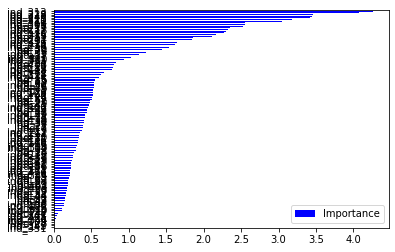

In [105]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='b')
plt.show()

In [106]:
Importance

,Importance
ind_5,0.526679
ind_6,0.391887
ind_8,0.106315
ind_9,0.151415
ind_10,0.333908
...,...
ind_416,0.805513
ind_418,0.406128
ind_424,0.037631
ind_426,0.328599


In [108]:
c1 = Importance.abs().unstack()
c1.sort_values(ascending = False)

Importance  ind_313    4.259718e+00
            ind_228    4.073363e+00
            ind_318    3.456348e+00
            ind_243    3.441302e+00
            ind_225    3.426755e+00
                           ...     
            ind_109    1.242045e-02
            ind_28     8.999896e-03
            ind_352    1.377500e-03
            ind_349    3.867637e-08
            ind_351    0.000000e+00
Length: 131, dtype: float64

In [111]:
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.5 and col1 != col2]

In [112]:
columns_above_1

[('Importance', 'ind_62'),
 ('Importance', 'ind_139'),
 ('Importance', 'ind_21'),
 ('Importance', 'ind_102'),
 ('Importance', 'ind_128'),
 ('Importance', 'ind_176'),
 ('Importance', 'ind_5'),
 ('Importance', 'ind_65'),
 ('Importance', 'ind_26'),
 ('Importance', 'ind_150'),
 ('Importance', 'ind_22'),
 ('Importance', 'ind_49'),
 ('Importance', 'ind_35'),
 ('Importance', 'ind_16'),
 ('Importance', 'ind_414'),
 ('Importance', 'ind_327'),
 ('Importance', 'ind_118'),
 ('Importance', 'ind_82'),
 ('Importance', 'ind_428'),
 ('Importance', 'ind_142'),
 ('Importance', 'ind_71'),
 ('Importance', 'ind_416'),
 ('Importance', 'ind_83'),
 ('Importance', 'ind_324'),
 ('Importance', 'ind_332'),
 ('Importance', 'ind_330'),
 ('Importance', 'ind_321'),
 ('Importance', 'ind_17'),
 ('Importance', 'ind_153'),
 ('Importance', 'ind_36'),
 ('Importance', 'ind_74'),
 ('Importance', 'ind_50'),
 ('Importance', 'ind_130'),
 ('Importance', 'ind_234'),
 ('Importance', 'ind_412'),
 ('Importance', 'ind_316'),
 ('Import

In [117]:
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_77", "ind_237",
        "ind_18", "ind_132", "ind_315", "ind_239", "ind_51", "ind_241", "ind_37","ind_316","ind_412", "ind_234", "ind_130",
        "ind_50", "ind_74", "ind_36", "ind_153", "ind_17", "ind_321", "ind_330", "ind_332", "ind_324", "ind_83","ind_416", "ind_71",
         "ind_142", "ind_428", "ind_82", "ind_118", "ind_327","ind_414", "ind_16", "ind_35", "ind_49", "ind_22", "ind_150","ind_26",
         "ind_65", "ind_5","ind_176", "ind_128","ind_102", "ind_21", "ind_139", "ind_62"]]
y= df["90_target"]

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 54), (1542, 54), (4625,), (1542,))

In [120]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [121]:
from sklearn.metrics import mean_squared_error
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.117319737346875

In [122]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [3,5,10],
              "n_estimators": [100,200,500, 1000]}

In [123]:
rfr_model = RandomForestRegressor(random_state=42)

In [124]:
rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 15.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7,

In [126]:
rfr_cv_model.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 500}

In [127]:
rfr_tuned = RandomForestRegressor(max_depth=9,
                                  max_features=10,
                                  n_estimators=500)

In [129]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [130]:
y_pred = rfr_tuned.predict(X_test)

In [131]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.029702699221858

# DecisionTreeRegressor

In [132]:
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_77", "ind_237",
        "ind_18", "ind_132", "ind_315", "ind_239", "ind_51", "ind_241", "ind_37","ind_316","ind_412", "ind_234", "ind_130",
        "ind_50", "ind_74", "ind_36", "ind_153", "ind_17", "ind_321", "ind_330", "ind_332", "ind_324", "ind_83","ind_416", "ind_71",
         "ind_142", "ind_428", "ind_82", "ind_118", "ind_327","ind_414", "ind_16", "ind_35", "ind_49", "ind_22", "ind_150","ind_26",
         "ind_65", "ind_5","ind_176", "ind_128","ind_102", "ind_21", "ind_139", "ind_62"]]
y= df["90_target"]

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42)
X_train.shape

(4625, 54)

In [136]:
from sklearn.tree import DecisionTreeRegressor
cart_model =  DecisionTreeRegressor()  

In [137]:
?cart_model

In [138]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

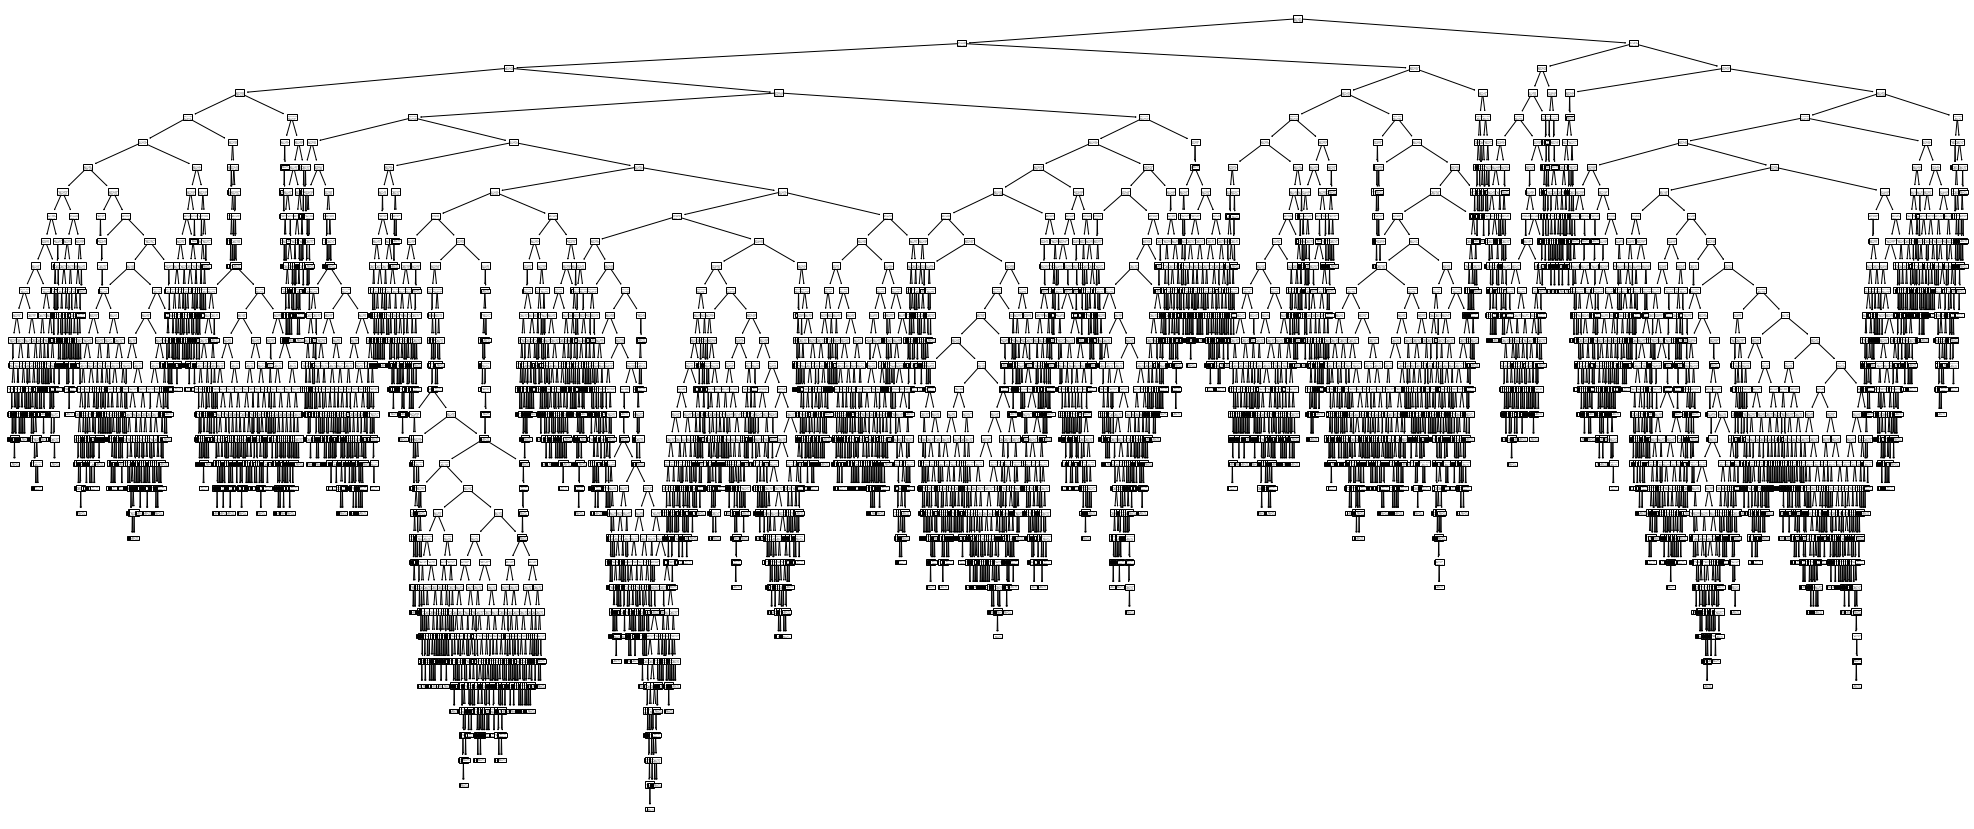

In [139]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [140]:
from skompiler import skompile

In [141]:
print(skompile(cart_model.predict).to('python/code'))

((((((((((((((-35.59933163 if x[19] <= -0.010455086128786206 else (
    -35.76902353 if x[48] <= -47.23315238952637 else -35.78132004 if x[53] <=
    -15.0 else -35.7920795) if x[33] <= -11.5 else (-35.74227861 if x[42] <=
    41.5 else -35.73705259 if x[5] <= -0.16773688793182373 else 
    -35.73858966) if x[4] <= 0.0036292196018621325 else -35.73274881 if x[
    47] <= -26.0 else -35.73121175) if x[25] <= 43.38816261291504 else ((
    -35.88522559 if x[47] <= -17.5 else -35.87754027) if x[48] <= 
    -12.556004524230957 else -35.88829972 if x[26] <= 10.323333263397217 else
    -35.89321833 if x[35] <= 0.4180420935153961 else -35.89690728) if x[42] <=
    16.0 else ((-35.86585858 if x[6] <= 100.32925796508789 else 
    -35.86770306) if x[17] <= 34.63188171386719 else -35.87200684 if x[12] <=
    -39.5 else -35.87538838) if x[42] <= 19.5 else (-35.860478855 if x[9] <=
    -7.5 else -35.855713955) if x[22] <= 8.0 else -35.84218779) if x[41] <=
    -15.696496725082397 else (((-35.9211929

In [142]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred  = cart_model.predict(X_test)

In [143]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.516242549525806

In [144]:
cart_params = {"min_samples_split": range(2,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,10)}

In [145]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv =10, n_jobs = -1, verbose=2)

In [146]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(2, 50)},
             pre_dispatch='2*n_jobs'

In [147]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_samples_split': 4}

In [148]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, 
                                   min_samples_leaf=10, 
                                   min_samples_split=4)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [149]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.443294762006076

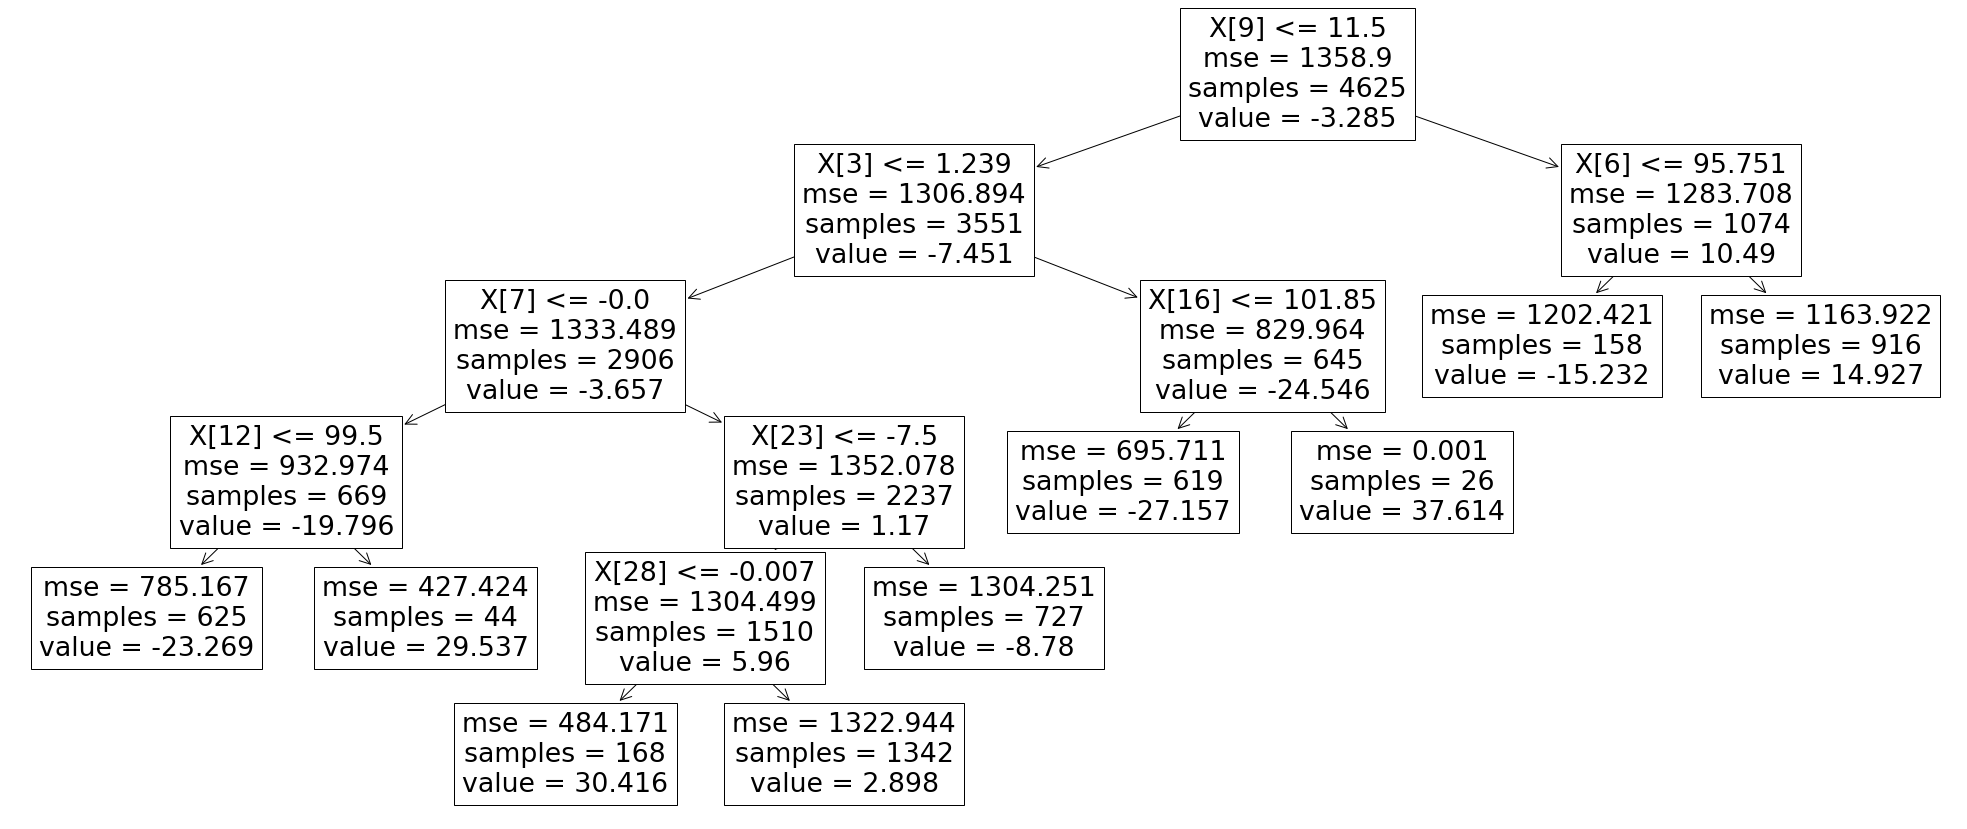

In [151]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_tuned);

# MLPRegressor

In [152]:
X1 = df[["ind_313", "ind_228", "ind_318", "ind_243", "ind_225","ind_310","ind_311", "ind_309", "ind_156", "ind_77", "ind_237",
        "ind_18", "ind_132", "ind_315", "ind_239", "ind_51", "ind_241", "ind_37","ind_316","ind_412", "ind_234", "ind_130",
        "ind_50", "ind_74", "ind_36", "ind_153", "ind_17", "ind_321", "ind_330", "ind_332", "ind_324", "ind_83","ind_416", "ind_71",
         "ind_142", "ind_428", "ind_82", "ind_118", "ind_327","ind_414", "ind_16", "ind_35", "ind_49", "ind_22", "ind_150","ind_26",
         "ind_65", "ind_5","ind_176", "ind_128","ind_102", "ind_21", "ind_139", "ind_62"]]
y= df["90_target"]

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4625, 54), (1542, 54), (4625,), (1542,))

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
X_train_scaled = scaler.transform(X_train)

In [159]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [160]:
X_test_scaled = scaler.transform(X_test)

In [161]:
from sklearn.neural_network import MLPRegressor

In [162]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [163]:
mlp_model.n_layers_

4

In [164]:
mlp_model.hidden_layer_sizes

(100, 20)

In [165]:
y_pred = mlp_model.predict(X_test_scaled)

In [166]:
np.sqrt(mean_squared_error(y_test,y_pred))

19.96155609215731

In [167]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [168]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.005],
              "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
              "activation": ["relu","logistic"]}

In [169]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10, n_jobs=-1, verbose=2)

In [170]:
from sklearn.model_selection import GridSearchCV
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
               

In [171]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [172]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="relu")

In [174]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [175]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [176]:
np.sqrt(mean_squared_error(y_test,y_pred))

18.076437403297042